# Notebook 2: Google Street View Monitoring

**Welcome to *CIVENG 190 Notebook 2*!** In this notebook we will be looking at **concentrations of primary air pollutants in Bay Area neighborhoods.**

Throughout this notebook you will learn to:

- Aggregate data (mean, standard deviation, variance) based on a common attribute 
- Create histograms for multi-dimensional datasets
- Plot time-resolved and neighborhood-resolved boxplots of concentrations


*Historical Context:*
Acute Exposure Guideline Levels were created in 1984 to measure the danger of exposure to air pollutants. The US Environmental Protection Agency has [information](https://www.epa.gov/aegl/history-acute-exposure-guideline-levels-aegls) about these studies.

### Table of Contents

1. [Introduction to the Data](#sectiondata)<br>

2. [Calculating Statistics](#sectionstats)<br>

3. [Histograms](#sectionhistograms)<br>

4. [Visualizing with *seaborn*](#sectionseaborn)<br>
    4a. [Plotting concentrations and neighborhoods](#subsectionplot)<br>

<br>

# Introduction to the Data <a id='sectiondata'>

The dataset we will be working with throughout this notebook is taken from the Center for Air, Climate, and Energy Solutions (CACES). CACES is a multi-university research center housed in Carnegie Mellon University and partnered with the Environmental Protection Agency (EPA). The research facility studies the impact of electricity, transportation, and urban development on air quality and human health. 


This data set in particular looks at the concentrations of common pollutants in Bay Area neighborhoods (by census level blocks) over a 32-month period (May 2015 - December 2017). Pollutant measurements were made using mobile monitoring platform moving through streets in four counties of the San Francisco Bay Area.


This dataset includes measurements of four pollutants:
- NO (units: ppb)
- NO2 (units:ppb)
- BC (black carbon, units: µg/m3)
- UFP (ultrafine particle count)


**Run the cell below to import it!**

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
plt.rcParams['figure.figsize'] = (16,8)
plt.rcParams['figure.dpi'] = 150
sns.set()
pd.set_option('display.max_columns', None)

In [67]:
data = pd.read_csv('datasets/Google Street View.csv')
data = data.drop(["Unnamed: 0", "samplingTime_NO", "visits_NO", "uniqueDays_NO", "samplingTime_NO2", "visits_NO2", 
                  "uniqueDays_NO2", "samplingTime_BC", "visits_BC", "uniqueDays_BC", "samplingTime_UFP", "visits_UFP", 
                  "uniqueDays_UFP"], axis=1)
data = data.dropna()
data.head()

,GISJOIN,TotalPop.x,WhiteNH,BlackNH,NativeNH,AsianNH,PacIsl,OtherNH,HispLat,OtherRace,NO,NO2,BC,UFP,Neighborhood
1,G06000104011003017,162,60,32,0,20,1,0,49,1,6.258333,9.298000,0.330840,45.300000,Downtown Oakland
2,G06000104011003018,4,0,4,0,0,0,0,0,0,14.000000,17.822500,0.615345,43.800000,Downtown Oakland
3,G06000104011003019,0,0,0,0,0,0,0,0,0,24.000000,18.619250,0.797645,43.500000,Downtown Oakland
4,G06000104013001000,0,0,0,0,0,0,0,0,0,20.000000,15.316000,0.535262,40.683333,Downtown Oakland
5,G06000104013001001,0,0,0,0,0,0,0,0,0,29.999999,18.985499,0.810837,53.000000,Downtown Oakland


Here is a breakdown of the dataframe above and what each column represents. 


|Column Name   | Description |
|--------------|---------|
|GISJOIN | GISJOIN identifier |
|TotalPop.x| Total Population of census block|
|WhiteNH | Population of White alone or in combination with one or more other races (Not Hispanic or Latino) Residents |
|BlackNH |Population of Black or African American alone or in combination with one or more other races (Not Hispanic or Latino) Residents |
|NativeNH | Population of American Indian and Alaska Native alone or in combination with one or more other races (Not Hispanic or Latino) Residents |
|AsianNH|Population of Asian alone or in combination with one or more other races (Not Hispanic or Latino) Residents|
|PacIsl|Population of Native Hawaiian and Other Pacific Islander alone or in combination with one or more other races (Not Hispanic or Latino) Residents |
|OtherNH |Population of Residents of some Other Race alone or in combination with one or more other races (Not Hispanic or Latino) |
|HispLat| Population of Hispanic or Latino Residents|
|OtherRace |Population of Residents of some Other Race alone or in combination with one or more other races|
|NO | NO measure |
|NO2 | NO2 measure |
|BC | BC measure |
|UFP | UFP measure |
|Neighborhood | Neighborhood the census block is in |


<br>

# Calculating Statistics <a id='sectionstats'>

Calculating statistics is a useful first step when analysing a data set with numerical data because it allows us to have a **high level understanding of general trends of the whole data set**. Additionally, as we look closer at specific aspects of the data set later on, having rough statistics in mind will allow us to pinpoint abnormal data points.

Below, we will learn how to calculate the _average_, _standard deviation_, and _variance_ of the data set using the `numpy` package. 

## Average

As a refresher, the mean of a collection of numbers/of a dataset is defined as *the sum of all elements in the collection divided by the number of elements in the collection*.

The mean gives vital information because it gives us **an idea of where the center value is located in a dataset**. In addition, the distribution of means of a large random sample can be a powerful tool for inference even if we don't have much information about the data of the underlying population – but more on that later!

Read more about it here: https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.mean.html.

For now, let's do a simple example with the `.mean()` function. First, let's make a small dataframe of two columns with number values and name it `nums`.

In [68]:
nums = pd.DataFrame({"A": [12, 4, 5, 44, 1],
                     "B": [5, 2, 54, 3, 2],})
nums

,A,B
0,12,5
1,4,2
2,5,54
3,44,3
4,1,2


When we run `nums.mean()`, we're returned the average over each index column (`A` and `B`).

In [69]:
nums.mean()

A    13.2
B    13.2
dtype: float64

If you want to find the average across rows instead (like `0` and `1`) then add an `axis=1` argument within .mean() to change the axis we're calculating across. Otherwise, it defaults to `axis=0`.

In [70]:
nums.mean(axis=1)

0     8.5
1     3.0
2    29.5
3    23.5
4     1.5
dtype: float64

Now, let's use the `.mean()` function to calculate the average pollutant measure across the whole population.

In [71]:
pop_avg = pd.DataFrame({'Avg NO': [data['NO'].mean()], 'Avg NO2': [data['NO2'].mean()],
                        'Avg BC': [data['BC'].mean()], 'Avg UFP': [data['UFP'].mean()]})
pop_avg

,Avg NO,Avg NO2,Avg BC,Avg UFP
0,7.097175,9.948856,0.364163,23.823489


Now that we have a rough understanding of what the overall averages of each pollutant is in the Bay Area, we can take a more granular look at the average measure of each pollutant in each neighborhood. 

First, we create a subset table of the data with just the pollutant measures and neighborhood. Each row in the table below represents a census block.  

In [1]:
pollutant_neighborhood = data[['NO','NO2','BC', 'UFP', 'Neighborhood']]
pollutant_neighborhood

NameError: name 'data' is not defined

Using the table we just created, we use the `.groupby()` function to group by the neighborhood and use mean as the aggregate function to calculate the mean of each pollutant in each neighborhood. 

In [73]:
pollutant_neighborhood.groupby('Neighborhood').agg('mean')

,NO,NO2,BC,UFP
Neighborhood,,,,
Berkeley,8.585843,10.646862,0.295799,22.216268
Downtown Oakland,13.862251,14.904861,0.445803,35.915337
East Oakland,6.852084,9.743595,0.283316,25.798940
Fruitvale Group,9.856481,11.546796,0.390609,26.119372
Livermore,1.933129,5.711881,0.252740,14.772433
Millbrae,4.244924,11.044617,0.630897,27.244562
Palo Alto,3.178907,6.221369,0.373183,21.481793
Redwood City,4.190320,8.574843,0.498178,20.648802
SF Financial,12.223029,14.862187,0.443114,25.187513


**Question:** Are there any neighborhoods that have abnormally high or low measures in any of the pollutant measures? 

*Your answer here*

**Now, we will repeat the same above process to find the standard deviation and variance of the data.**

<br>

## Variance

**Variance is defined as the mean squared deviation (from the average).** The deviation from the average is just showing how far a value is from the mean: `value - average`, or you can just use `.var()`.

It can tell you _somewhat_ about the degree of spread in a data set, but since it's not on the same scale as the original variable – its units are the square of the original – interpretation can be difficult. Stay tuned for the standard deviation!

Read more about it here: https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.var.html.

Let's use `.var()` to find the variance across the whole population, as we did for the average.

In [74]:
pop_var = pd.DataFrame({'NO Var': [data['NO'].var()], 'NO2 Var': [data['NO2'].var()],
                        'BC Var': [data['BC'].var()], 'UFP Var': [data['UFP'].var()]})
pop_var

,NO Var,NO2 Var,BC Var,UFP Var
0,64.118773,25.111327,0.0488,148.237558


In [75]:
pollutant_neighborhood.groupby('Neighborhood').var()

,NO,NO2,BC,UFP
Neighborhood,,,,
Berkeley,38.898428,14.395529,0.013628,27.731468
Downtown Oakland,120.455770,19.362753,0.052097,125.652870
East Oakland,70.185946,13.311049,0.023836,80.677141
Fruitvale Group,54.197589,12.851433,0.043544,95.063260
Livermore,17.869594,10.916038,0.016849,18.855815
Millbrae,41.092538,20.366700,0.072920,199.763284
Palo Alto,26.520858,16.695839,0.064053,81.084322
Redwood City,16.632364,5.846219,0.035639,35.976654
SF Financial,53.850492,18.447507,0.054781,53.171210


The neighborhoods that fell into the top five of each pollutant the most often were: Downtown Oakland, SF Financial, Millbrae, Fruitvale, West Oakland.

<br>

## Standard Deviation

**The standard deviation (SD) of a list is defined as the root mean square of deviations from average.** That might seem like a lot but reading it from right to left will give you the steps on how to calculate it. From the variance we found above, taking the positive square root will give you the standard deviation, or you can just use `.std()`.

Standard deviation is important because it tells us how spread out the values are in a given dataset, as in how far the values are from their average.

Read more about it here: https://numpy.org/doc/stable/reference/generated/numpy.std.html.

Finally, let's find the standard deviation across the whole population.

In [76]:
pop_std = pd.DataFrame({'NO Std': [data['NO'].std()], 'NO2 Std': [data['NO2'].std()],
                        'BC Std': [data['BC'].std()], 'UFP Std': [data['UFP'].std()]})
pop_std

,NO Std,NO2 Std,BC Std,UFP Std
0,8.00742,5.01112,0.220907,12.175285


In [77]:
pollutant_neighborhood.groupby('Neighborhood').std()

,NO,NO2,BC,UFP
Neighborhood,,,,
Berkeley,6.236860,3.794144,0.116737,5.266068
Downtown Oakland,10.975234,4.400313,0.228247,11.209499
East Oakland,8.377705,3.648431,0.154390,8.982046
Fruitvale Group,7.361901,3.584890,0.208672,9.750039
Livermore,4.227244,3.303943,0.129802,4.342328
Millbrae,6.410346,4.512948,0.270038,14.133764
Palo Alto,5.149841,4.086054,0.253088,9.004683
Redwood City,4.078280,2.417896,0.188784,5.998054
SF Financial,7.338289,4.295056,0.234053,7.291859


<br>

# Histograms
<a id ='sectionhistograms'>

Now, we will utilize histograms to visualize our dataset. Here, we are utilizing `Seaborn` - a useful library in data science for generating a wide variety of visualizations. For further exploration, you can check out the introduction at the following [link](https://seaborn.pydata.org/tutorial/introduction.html), and check out the wide variety of visualizations possible with this tool.

`Histograms` are graphical representations of datasets which allow us to group them into logical ranges/bins. Histograms are helpful for us to understand the distribution of the values of a dataset, if the distribution is skewed/symmetrical, and perform further data analysis. Now we'll take a look at our dataset.

In [78]:
neighborhoods = list(data['Neighborhood'].unique())
races = ['WhiteNH', 'BlackNH', 'NativeNH', 'AsianNH', 'PacIsl', 'OtherNH', 'HispLat', 'OtherRace']
sns.set(rc = {'figure.figsize':(20,8)})

# NO Pollution

The following is a histogram of the NO pollutant measure, color-coded by neighborhood. The histplot function allows us to use a dataset and not only visualize the values by count and more, but also take visualization a step further by color-coding with the hue parameter.

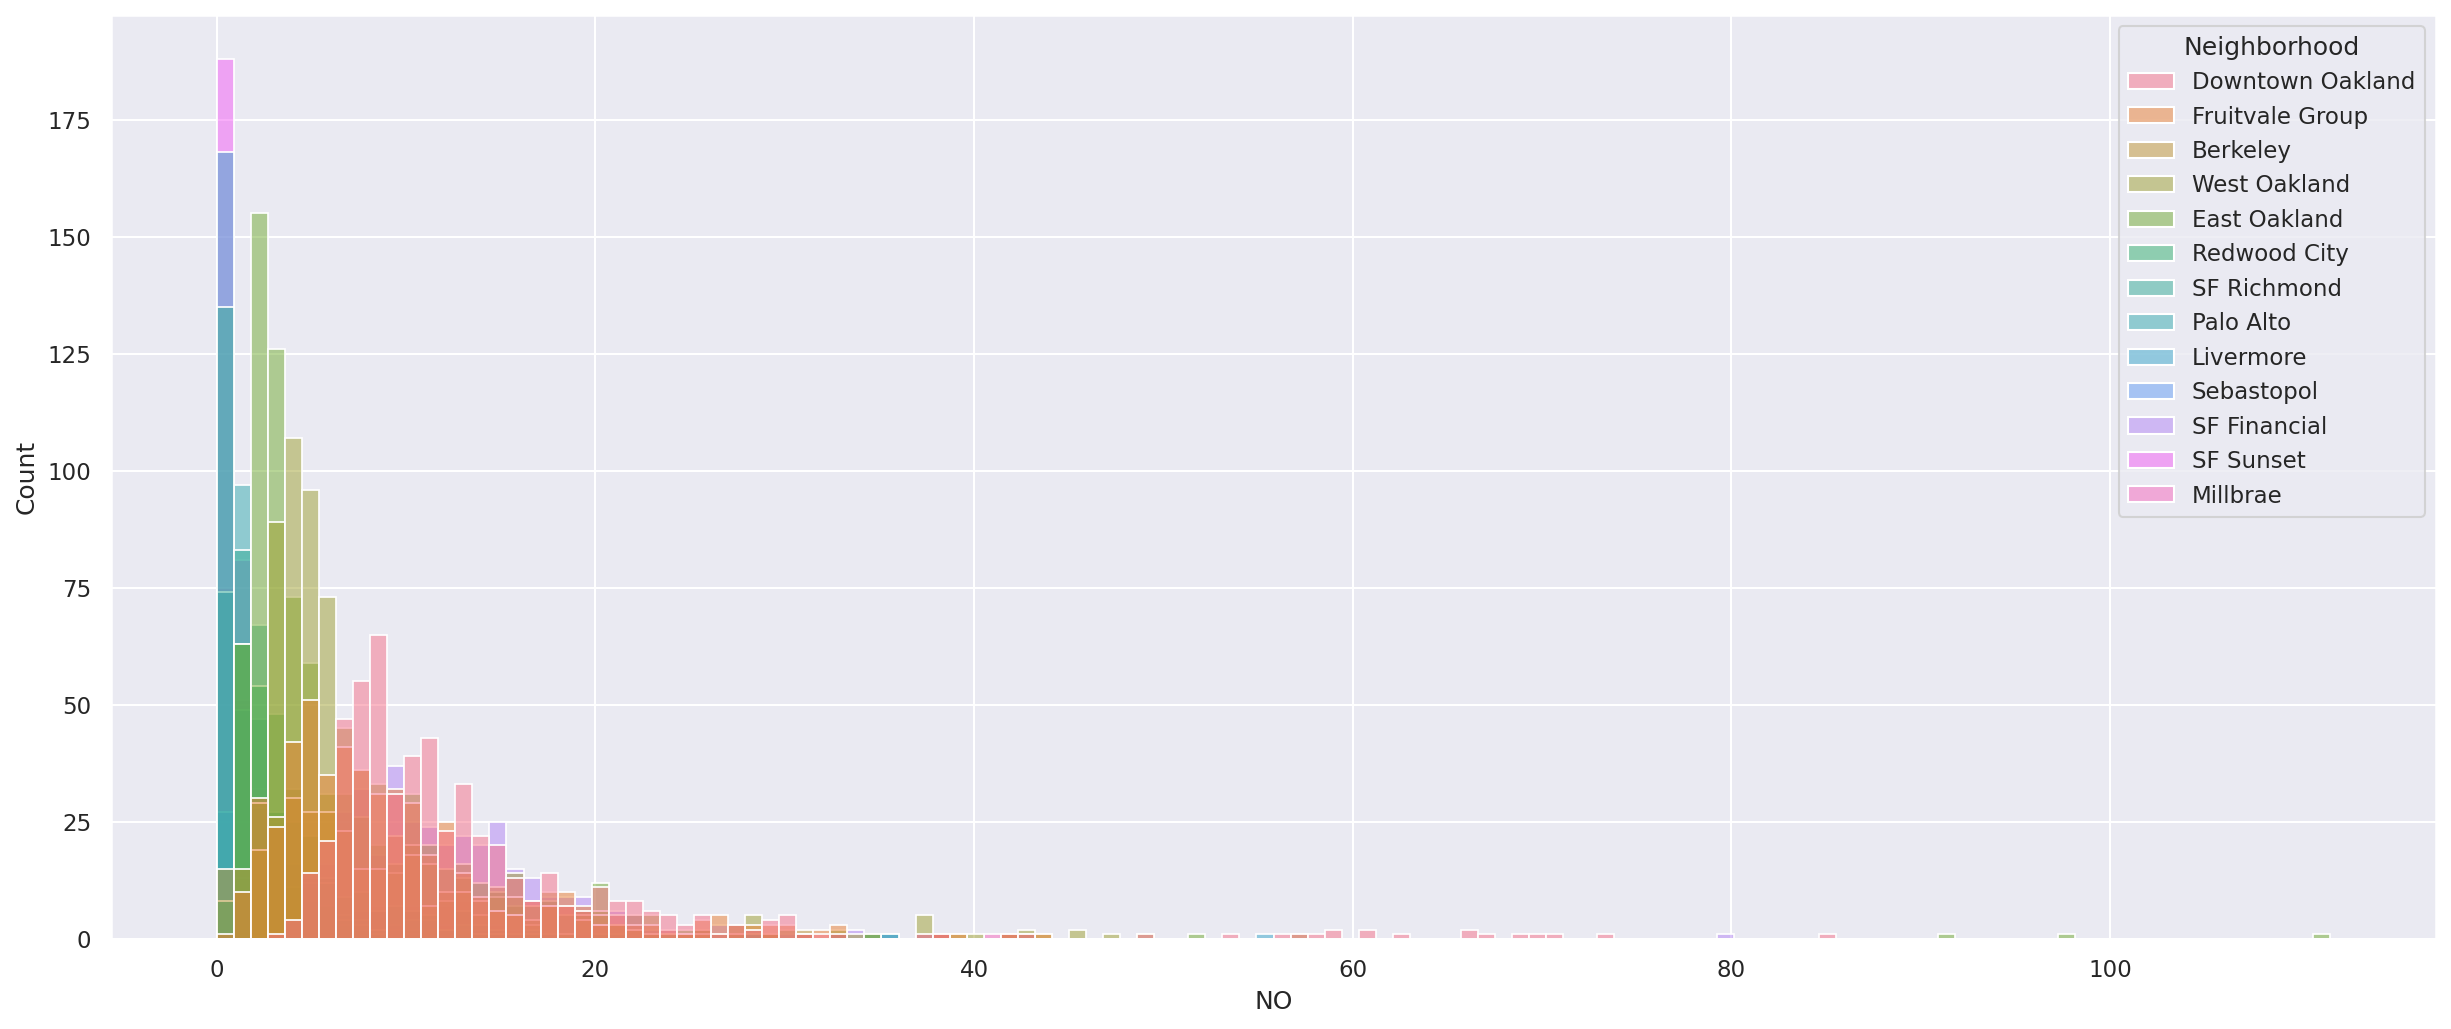

In [79]:
sns.histplot(data, x="NO", hue="Neighborhood");

**Question:** In two sentences or less, briefly describe the distribution (shape, center, spread). What does the distribution tell you?

*Your answer here*

# NO2 Pollution

The following cell generates another histogram, displaying instead the distribution of NO2 pollutant measure color-coded by neighborhood.

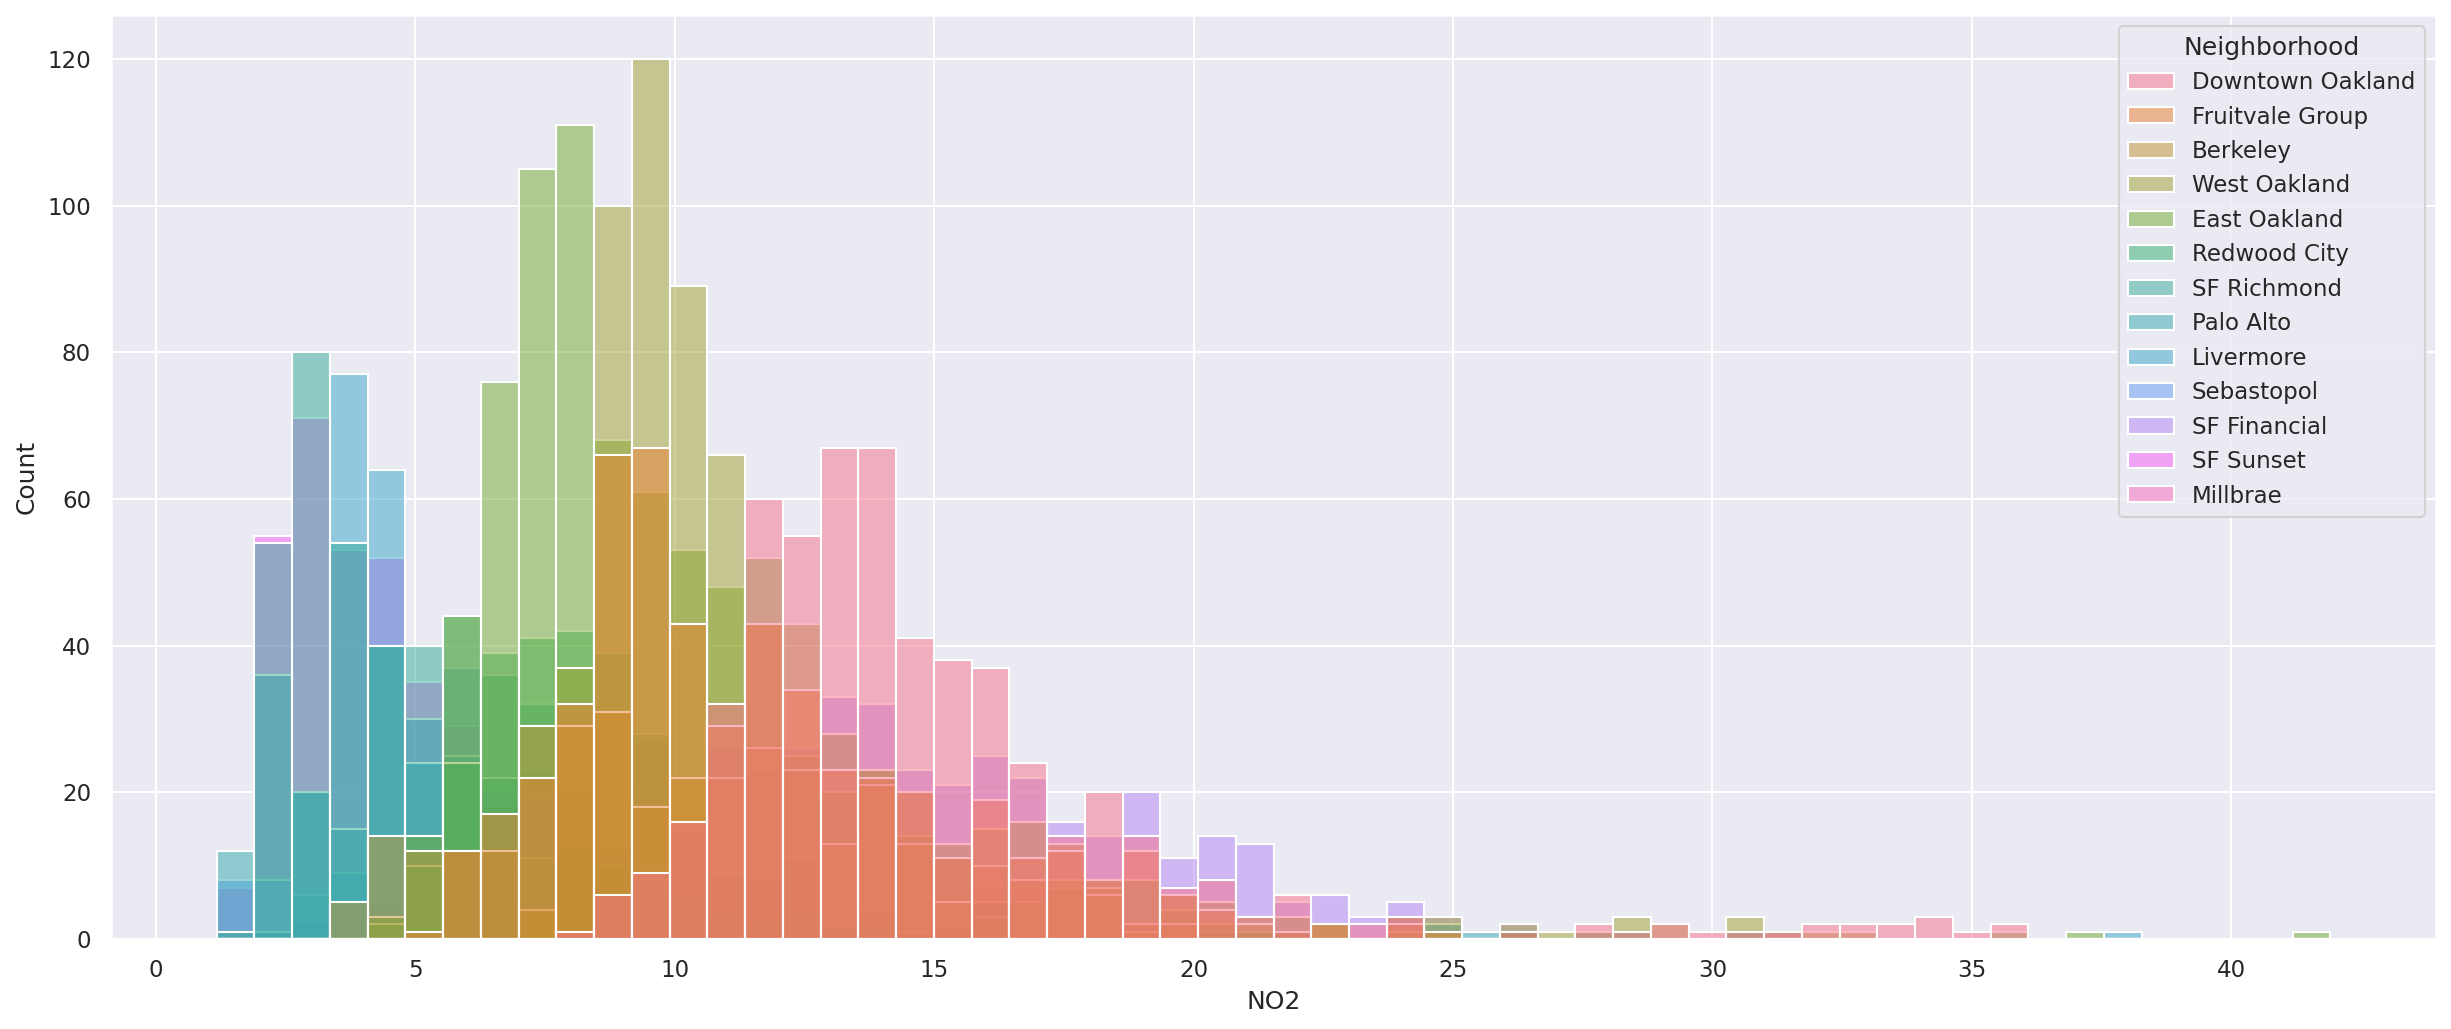

In [80]:
sns.histplot(data, x="NO2", hue="Neighborhood");

# BC Pollution

Here is another pollutant, utilizing the histplot function as well.

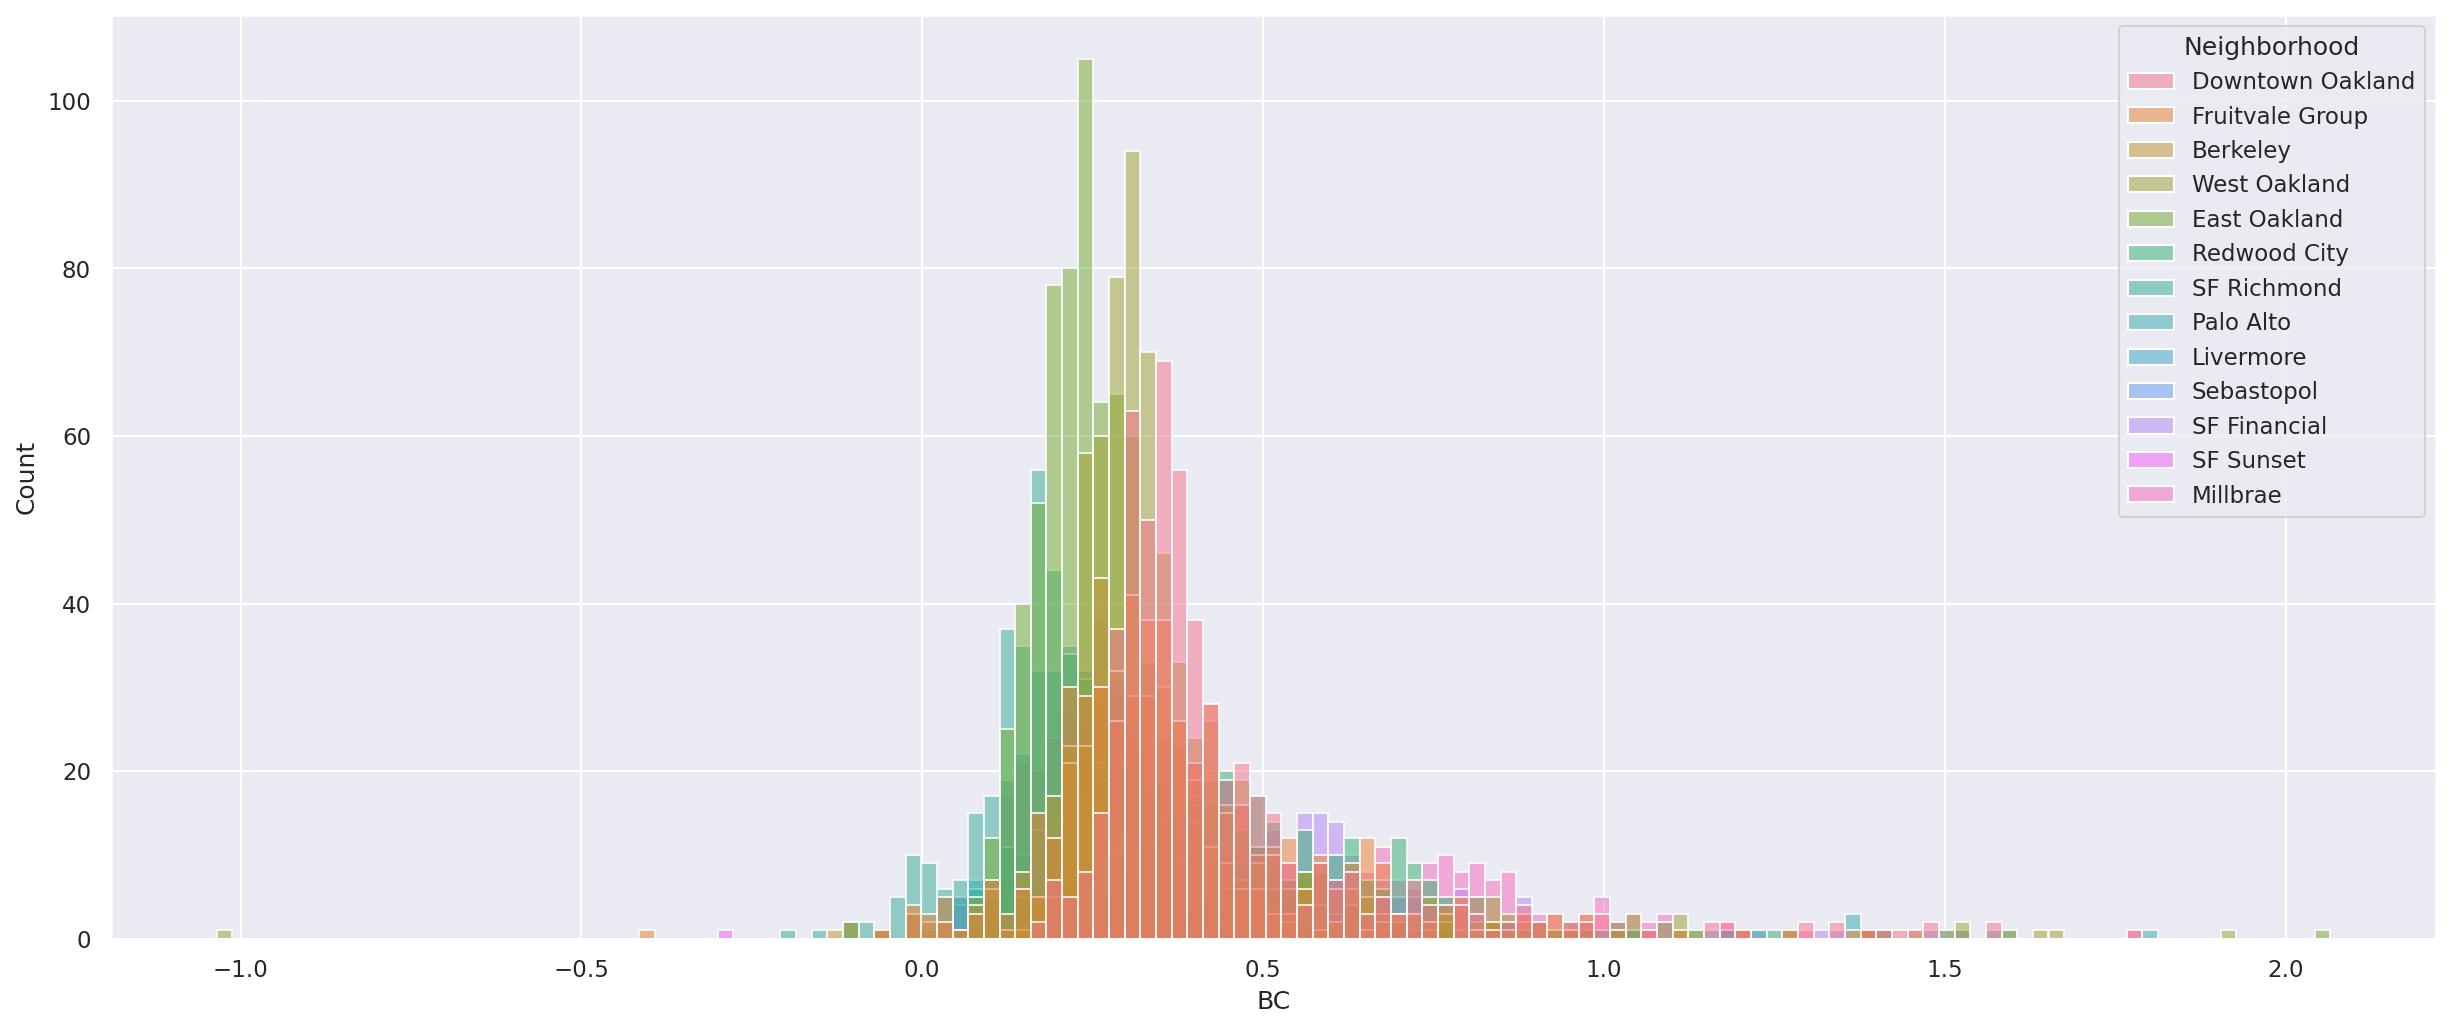

In [81]:
sns.histplot(data, x="BC", hue="Neighborhood"); 

# UFP Pollution
**Do it yourself!** Using what you've learned from the following three histograms generated from the histplot function above, use the function to generate one for the UFP measure distribution. If you feel stuck, check the differences between the BC, NO2, and NO code lines. 
Hint: *Remember that in this case, the x would be "UFP"!*

In [82]:
# Your code here!

Congratulations! :) You've utilized Seaborn to generate high-quality histograms visualizing our dataset's distrbution.

<br>

# Visualizing with `seaborn` <a id='sectionseaborn'>

In this section, you'll be learning how to visualize data with the Python library `seaborn`. If you have already taken Data 8, you may remember using the matplotlib/plt library to do visualizations. `seaborn` is built on top of `matplotlib` and has a similar workflow in addition to sharing many of the commands. 

**Let's take a look at `seaborn` in action!**
For more information about *seaborn*, click [here](https://seaborn.pydata.org/).

We'll be using the `tips` dataset to learn about boxplots in `seaborn`. Start by reading in the dataset.

In [83]:
tips = sns.load_dataset("tips")
tips.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


Let's make a boxplot with `day` on the x-axis and `total_bill` on the y-axis. To do this, we're going to use `sns.boxplot`. Feel free to look at the documentation here: https://seaborn.pydata.org/generated/seaborn.boxplot.html.

In order for `day` to be on our x-axis, let's assign the **`x`** property to equal a string of the label we want on the x-axis (in this case, `day`). The same thing happens for the y-axis (**`y`**). In order for `seaborn` to know which dataframe we want to use for this plot, make sure that **`data`** is assigned to the name of the dataframe you want to use in this plot.

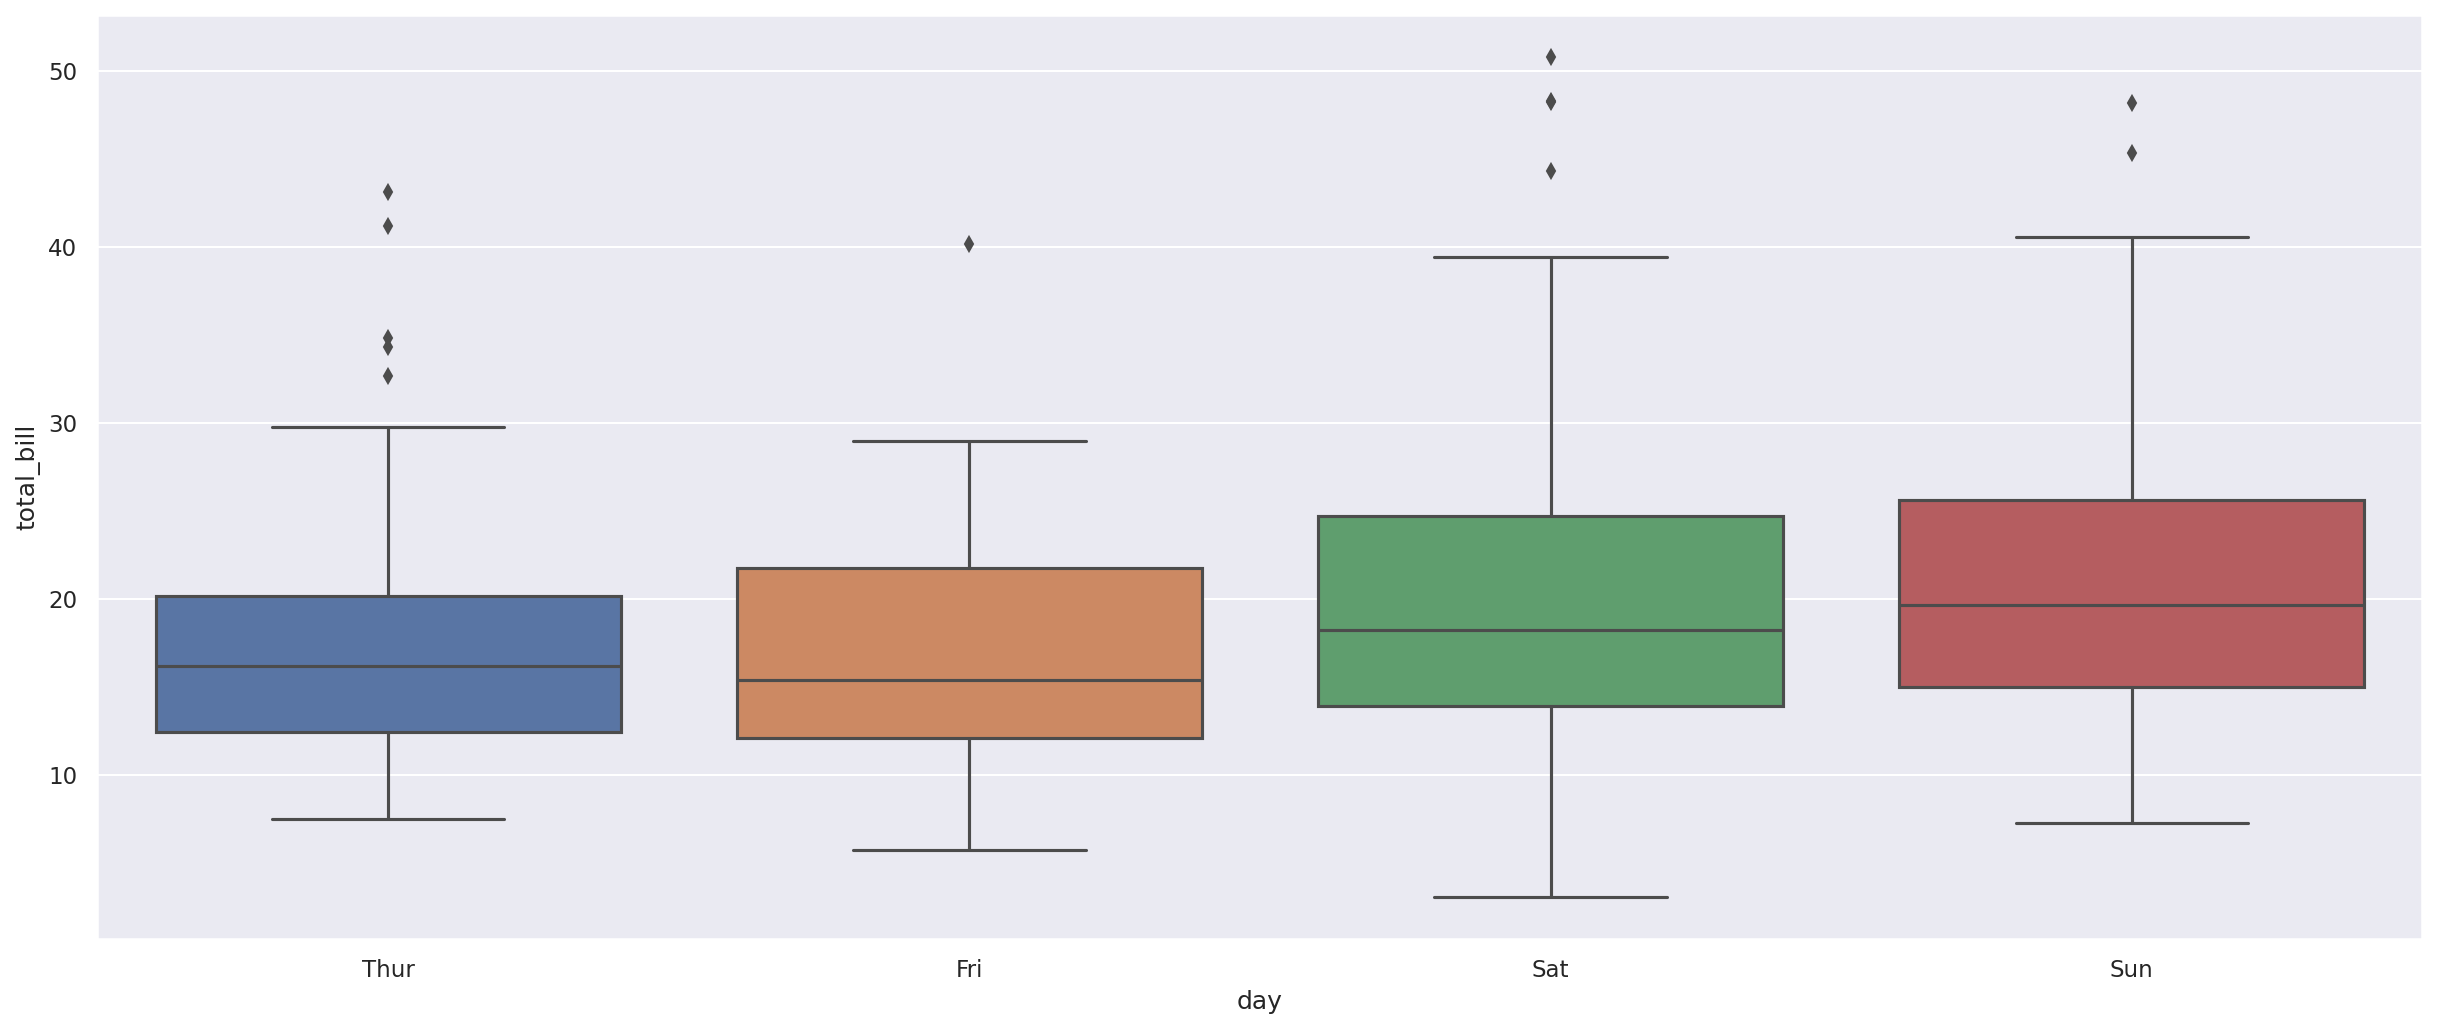

In [84]:
sns.boxplot(x="day",y="total_bill",data=tips); 

Now let's change the labels to the visualization. This can be done using `plt.xlabel()` and `plt.ylabel()`. *Note that the prefix is `plt` and not `sns`*. This is because `matplotlib` is being used to control parts of `seaborn`.

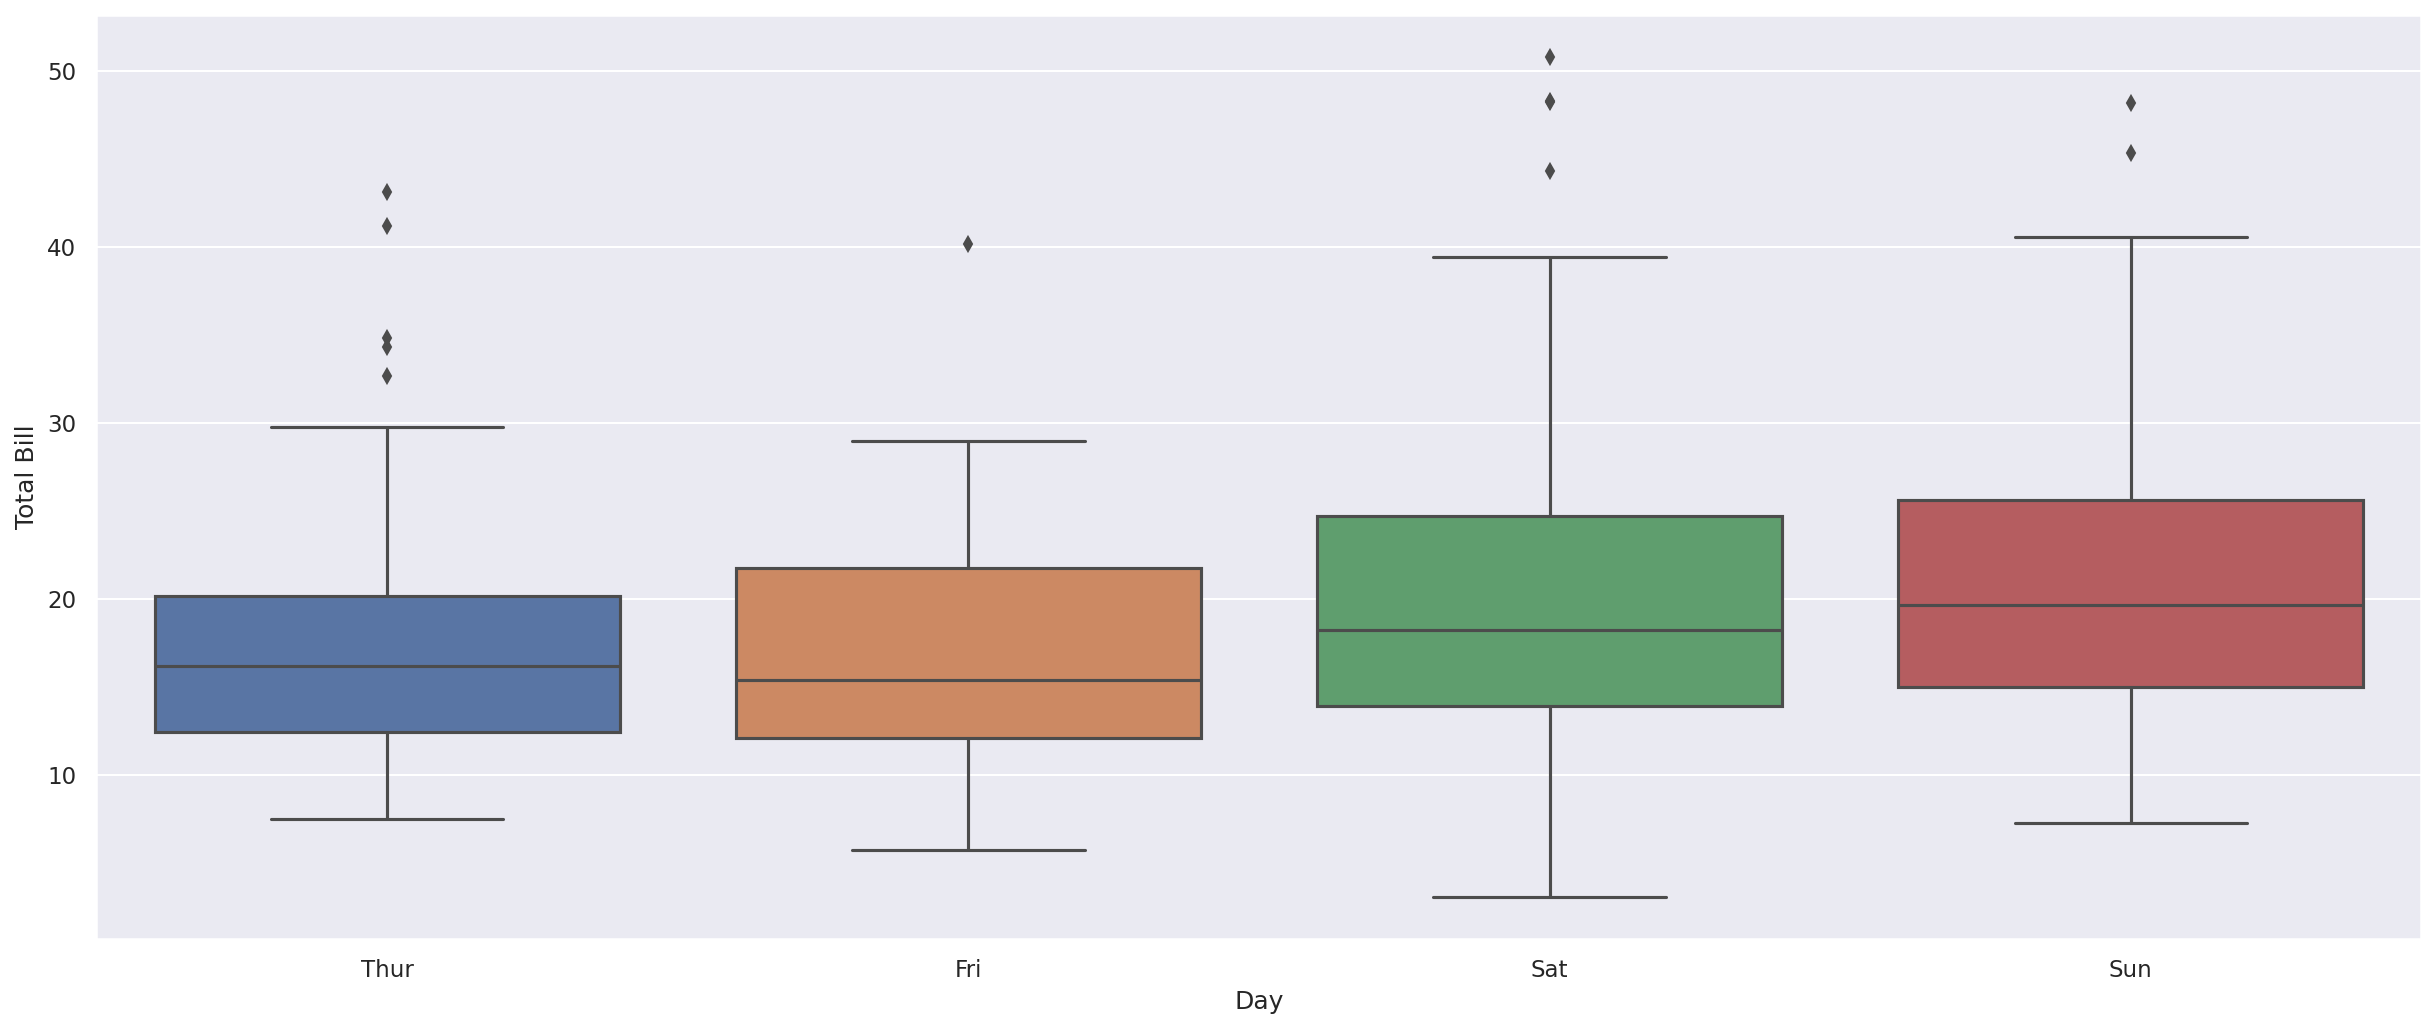

In [85]:
sns.boxplot(x="day",y="total_bill",data=tips)

# Uses plt and not sns
plt.xlabel("Day")
plt.ylabel("Total Bill"); 

What about those outlier points outside of the boxplot? We can remove them from the visualization using the **`showfliers`** argument inside of the `sns.boxplot` method and setting this to `False`.

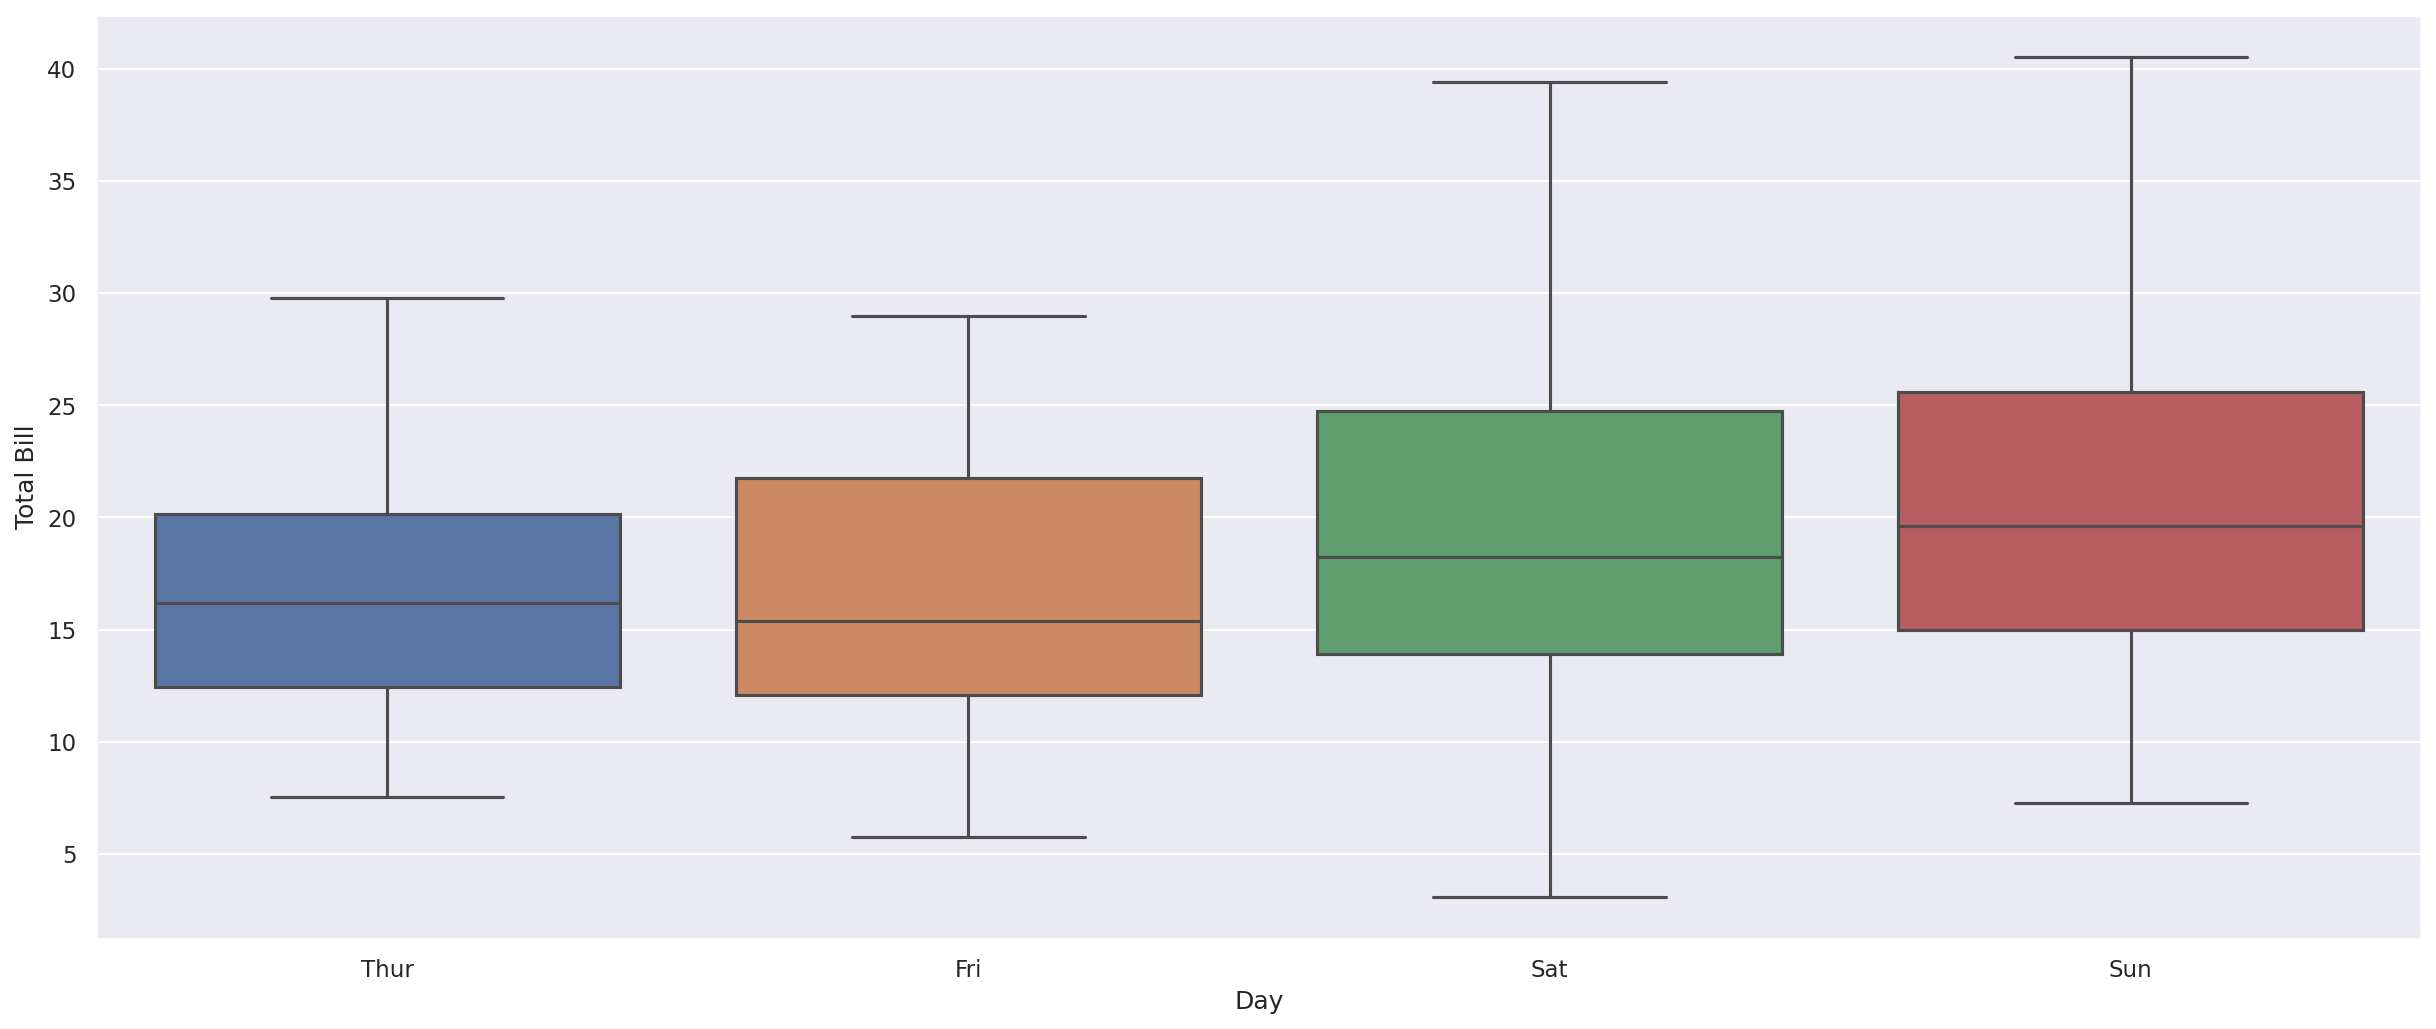

In [86]:
sns.boxplot(x="day",y="total_bill",data=tips, showfliers=False)
plt.xlabel("Day")
plt.ylabel("Total Bill"); 

What if we want to see the mean of each boxplot in addition to the median that is built into the boxplot? We can use `showmeans` to accomplish this. Set `showmeans` to `True` to add in the mean of each boxplot.

We can also edit the appearance of the mean point using `meanprops`. You don't have to know how this part works, but experiment with its uses!

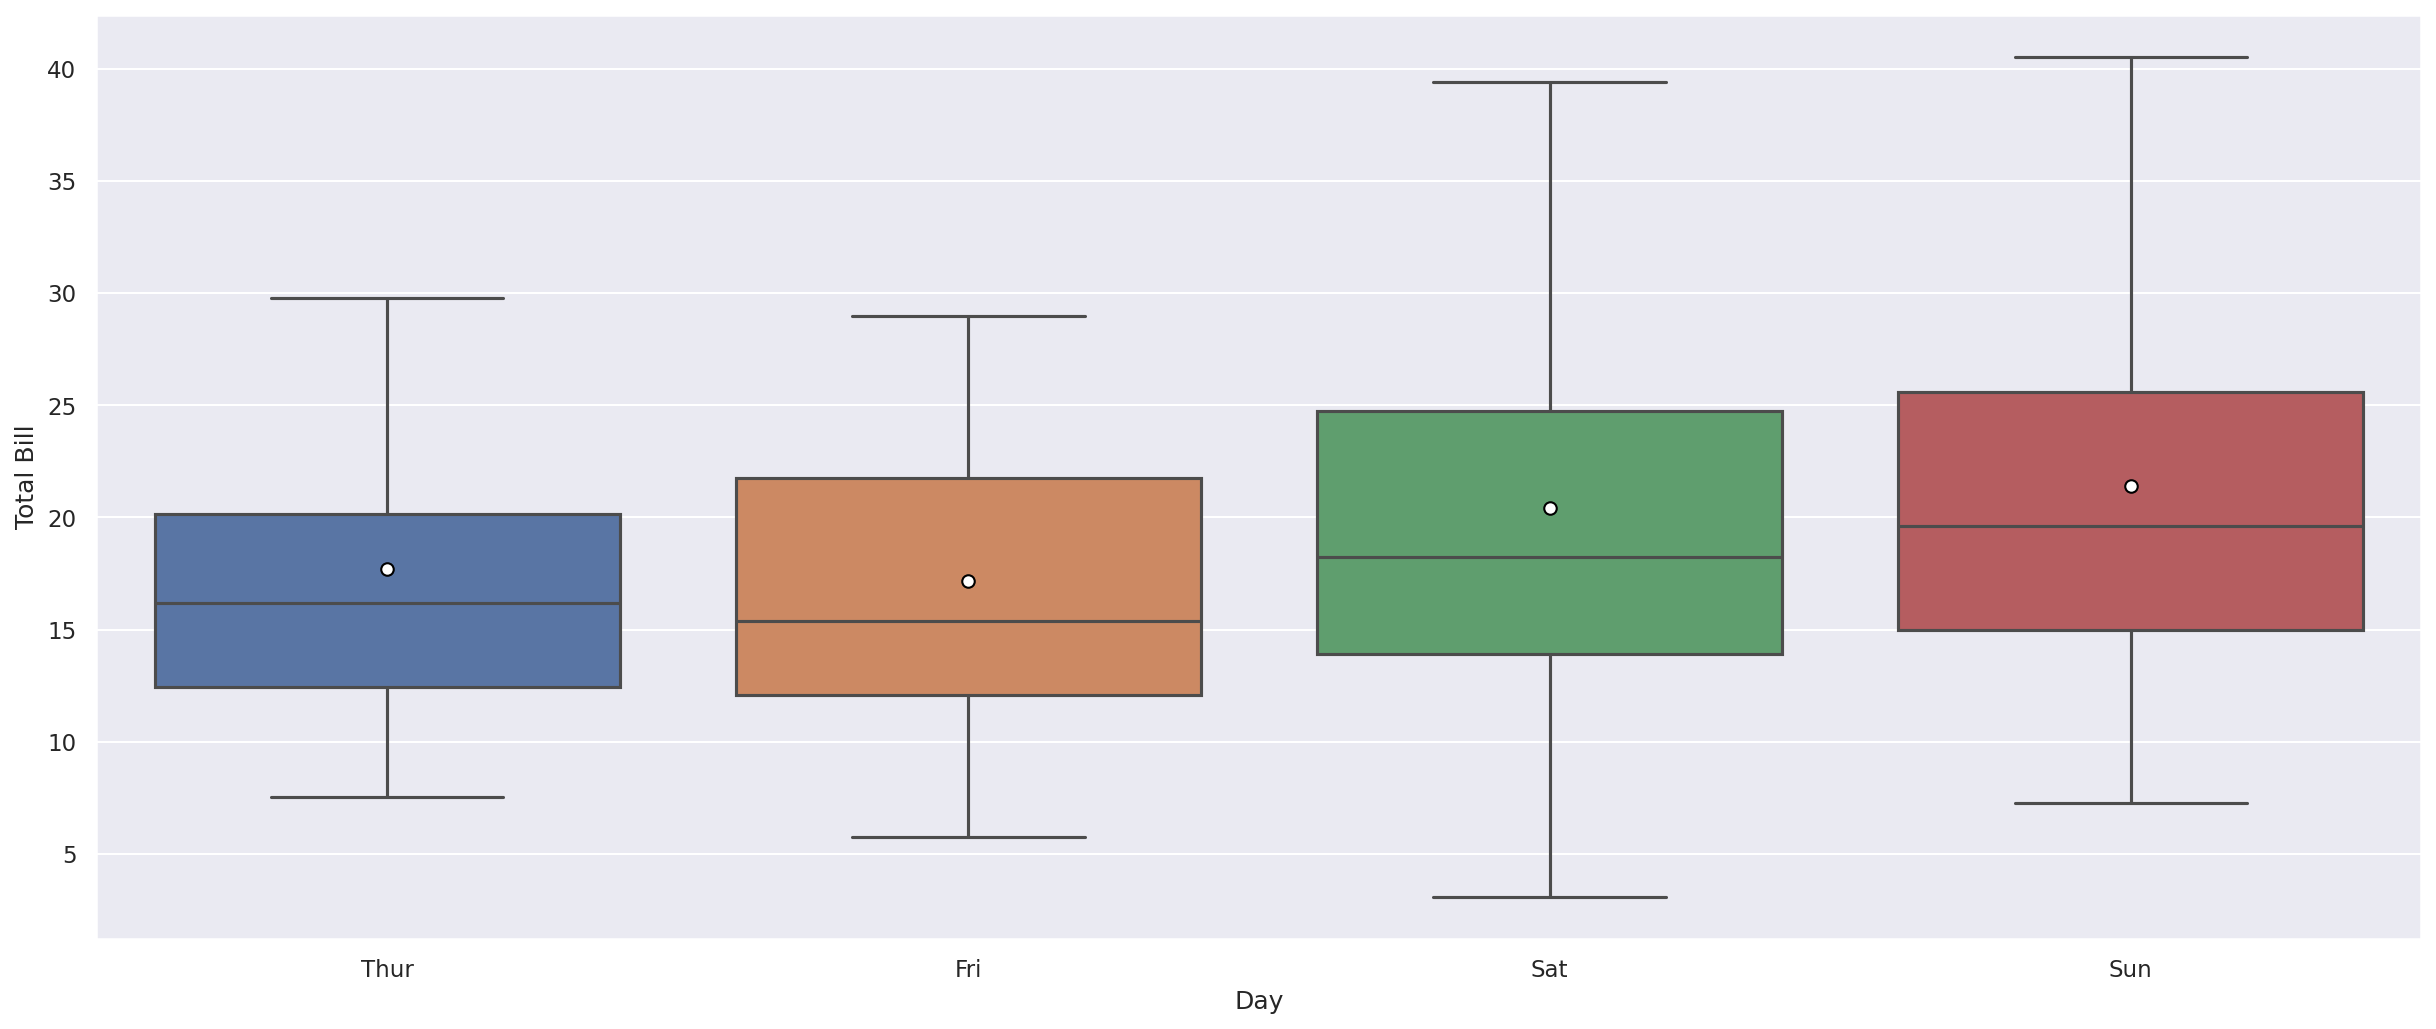

In [87]:
sns.boxplot(x="day",y="total_bill",data=tips, showfliers=False, showmeans=True,
           meanprops={"marker":"o","markerfacecolor":"white", "markeredgecolor":"black"})
plt.xlabel("Day")
plt.ylabel("Total Bill"); 

Finally, let's adjust the labels of the x-axis so they're a little easier to read among other labels. We can use `plt.tick_params()` to do this. *Note again that we are using `plt` for this and not `sns`*.

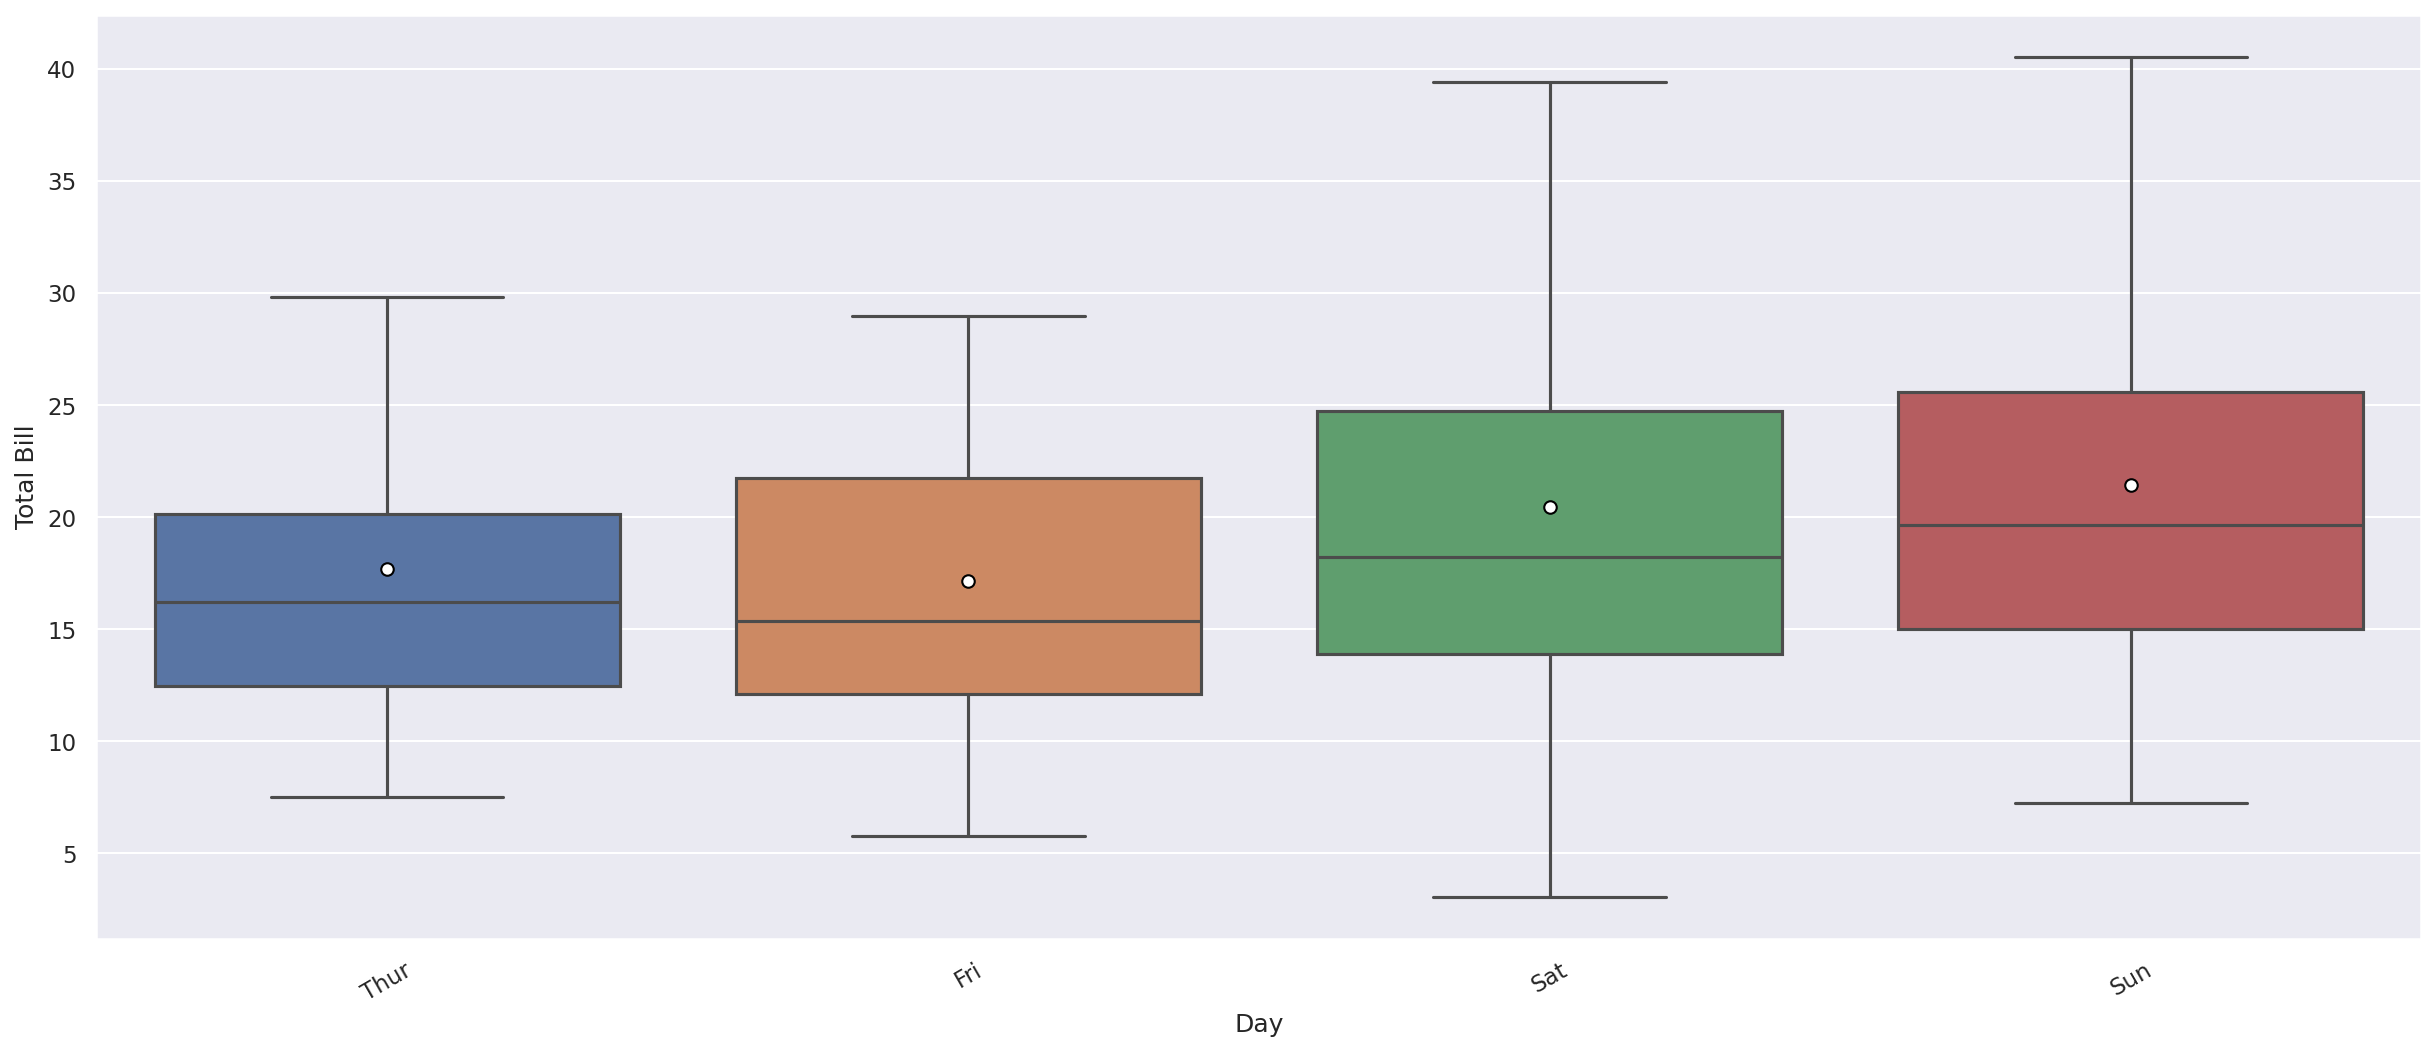

In [88]:
sns.boxplot(x="day",y="total_bill",data=tips, showfliers=False, showmeans=True,
           meanprops={"marker":"o","markerfacecolor":"white", "markeredgecolor":"black"})
plt.xlabel("Day")
plt.ylabel("Total Bill")
# Selects the x-axis labels and rotates them 30 degrees
plt.tick_params(axis="x", labelrotation = 30);

**Great work!** We now have a great box and whisker plot to show the five-number summary (minimum, first quartile, median, third quartile, and maximum) of total bills from *Thursday* to *Sunday*.

<br>

## Plotting Concentrations and Neighborhoods <a id='subsectionplot'>

Now it's *your turn*! In this section, you will be applying the things you learned to create boxplots about chemical concentration and neighborhoods in the Bay Area.

**Create a boxplot with:**
* `Neighborhood` on the x-axis.
* `NO` on the y-axis. 
* Make sure you set the `data` parameter to equal the name of out dataframe, `data`.
* No outliers (remember `showfliers`).
* The means shown on the boxplot (`showmeans`).
* Labels on the x-axis rotated 30 degrees.

The sell below creates the order the Neighborhoods will be plotted in for the visualization.

In [2]:
order = data[["NO","Neighborhood"]].groupby("Neighborhood").median().sort_values("NO",ascending=False).index

NameError: name 'data' is not defined

**Now we will create a boxplot by filling in the following blanks.**

* To set `Neighborhood` as the x-axis, set `x="Neighborhood"`
* To set `NO` as the y-axis, set `y="NO"`
* The dataset we are using is called `data`, so set `data= data`

In [90]:
sns.boxplot(x=...,y=...,data=..., showfliers=False, order=order, showmeans=True,
           meanprops={"marker":"o","markerfacecolor":"white", "markeredgecolor":"black"})
plt.tick_params(axis="x", labelrotation = 30)

AttributeError: 'ellipsis' object has no attribute 'get'

**Now we will create another boxplot but with `NO2` on the y-axis, instead of `NO`.**

Once again, this cell below creates the order the Neighborhoods will be plotted in for the visualization.

In [ ]:
# Just run this cell!
order2 = data[["NO2","Neighborhood"]].groupby("Neighborhood").median().sort_values("NO2",ascending=False).index

**To create the boxplot, fill in the following blanks.**

* To set `Neighborhood` as the x-axis, set `x="Neighborhood"`
* To set `NO2` as the y-axis, set `y="NO2"`
* The dataset we are using is called `data`, so set `data= data`

In [ ]:
sns.boxplot(x=...,y=...,data=..., showfliers=False, order=order2, showmeans=True,
           meanprops={"marker":"o","markerfacecolor":"white", "markeredgecolor":"black"})
plt.tick_params(axis="x", labelrotation = 30)

**Great job! Now, create a box plot where `BC` is on the y-axis by filling in the blank.**

Hint: Set `y="BC"`

In [4]:
# Just run this cell!
# This cell below creates the order the Neighborhoods will be plotted in for the visualization.
order3 = data[["BC","Neighborhood"]].groupby("Neighborhood").median().sort_values("BC",ascending=False).index

NameError: name 'data' is not defined

In [3]:
#Your code in the blank here
sns.boxplot(x="Neighborhood",y=...,data=data, showfliers=False, order=order3, showmeans=True,
           meanprops={"marker":"o","markerfacecolor":"white", "markeredgecolor":"black"})
plt.tick_params(axis="x", labelrotation = 30)

NameError: name 'data' is not defined

**Last one! Put `UFP` on the y-axis by filling in the blank.**

Hint: What should you set `y=` to?

In [5]:
# Just run this cell
# This cell below creates the order the Neighborhoods will be plotted in for the visualization.

order4 = data[["UFP","Neighborhood"]].groupby("Neighborhood").median().sort_values("UFP",ascending=False).index

NameError: name 'data' is not defined

In [6]:
#Your code in the blank
sns.boxplot(x="Neighborhood",y=...,data=data, showfliers=False, order=order4, showmeans=True,
           meanprops={"marker":"o","markerfacecolor":"white", "markeredgecolor":"black"})
plt.tick_params(axis="x", labelrotation = 30)

NameError: name 'data' is not defined

<br>

## Conclusion <a id='subsectionplot'>

**Great job for finishing the notebook!**
A quick recap of what you learned in this notebook: 
* Calculating statistics to understand general trends of the entire dataset. 
* Learned about distributions, visualizations using histograms, and generating them using Seaborn.
* Created visualizations such as histograms and box plots using Seaborn.

<br>
Created by Skye Pickett, Lori Khashaki, Vishali Kirthi Vallioor, and Abigail Yu